In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE=256
BATCH_SIZE=32
channels=3
EPOCHS=50

In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

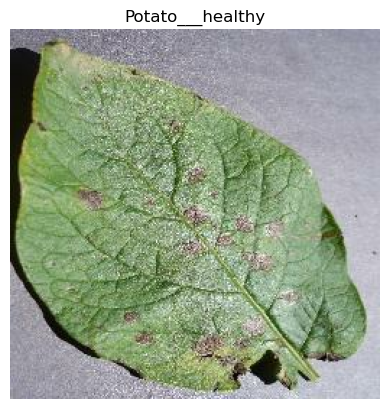

In [28]:
for image_batch,label_batch in dataset.take(2):
    plt.title(class_names[label_batch[3]])
    plt.imshow(image_batch[2].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
#taking 54 batches
train_ds=dataset.take(54)

In [32]:
test_ds=dataset.skip(54) 

In [33]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

In [34]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
        ds_size=len(ds)
        
        if shuffle:
            ds=ds.shuffle(shuffle_size,seed=12)
        
        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
        
        train_ds=ds.take(train_size)
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
        
        return train_ds,val_ds,test_ds

In [35]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [36]:
len(train_ds)

54

In [37]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])


In [41]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])